La teoria moderna del portafoglio è iniziata con il lavoro seminale di Harry Markowitz del 1952, "Portfolio Selection" (Markowitz, 1952), per il quale avrebbe poi ricevuto il Premio Nobel per le Scienze Economiche nel 1990.

Egli propose l'idea che gli investitori avversi al rischio dovrebbero ottimizzare il loro portafoglio basandosi su una combinazione di due obiettivi: rendimento atteso e rischio.

Fino ad oggi, questa idea è rimasta centrale nell'ottimizzazione del portafoglio. In pratica, tuttavia, la formulazione originale del portafoglio di Markowitz non funziona come previsto. Di conseguenza, la maggior parte dei professionisti la combina con varie euristiche o evita di utilizzarla del tutto.

Negli ultimi 70 anni, ricercatori e professionisti hanno riconsiderato la formulazione del portafoglio di Markowitz, portando a numerose variazioni, miglioramenti e alternative. 

Queste includono metodi di ottimizzazione robusta, misure di rischio alternative, regolarizzazione, stime migliorate della matrice di covarianza tramite la teoria delle matrici casuali, stime robuste per code pesanti, modelli fattoriali, modelli medi, modelli di clustering della volatilità, formulazioni di parità di rischio e altro ancora.

## Descrizione del Libro

Questo libro esplora la modellazione pratica dei dati finanziari e l'ottimizzazione di portafoglio, coprendo un'ampia gamma di varianti ed estensioni. 

Inizia sistematicamente con formulazioni matematiche e procede allo sviluppo di algoritmi numerici pratici, arricchiti da esempi di codice per facilitare la comprensione.

* La modellazione dei dati finanziari trattata in questo libro si discosta dall'ipotesi irrealistica di distribuzioni gaussiane, approfondendo modelli più realistici basati su distribuzioni con code pesanti. Viene affrontata una vasta gamma di argomenti, che spaziano dai modelli di serie temporali di base — con ampio utilizzo dei metodi di filtraggio di Kalman — fino alle tecniche più avanzate per la stima di grafi finanziari.

* Le formulazioni di portafoglio trattate in questo libro coprono un'ampia gamma, che va dal portafoglio media-varianza di Markowitz del 1952 e dal portafoglio a massimo Sharpe ratio del 1966, fino a formulazioni più sofisticate come:

  - Portafogli basati su Kelly
  - Portafogli basati sull'utilità
  - Portafogli di ordine superiore
  - Portafogli a rischio di ribasso
  - Portafogli a semi-varianza
  - Portafogli CVaR
  - Portafogli a drawdown
  - Portafogli a parità di rischio
  - Portafogli basati su grafi
  - Portafogli di replica di indici
  - Portafogli robusti
  - Portafogli bootstrapped
  - Portafogli bagged
  - Portafogli per pairs trading
  - Portafogli per arbitraggio statistico
  - Portafogli basati su deep learning

  ...e altri ancora.

Il focus principale e il tema centrale di questo libro è rappresentato dagli algoritmi pratici per la formulazione di portafogli, che possono essere eseguiti senza difficoltà su un computer standard.

## Cosa è la portfolio optimization?


Supponiamo di osservare una variabile casuale $X$ con media $\mu = \mathbb{E}[X]$ e varianza $\sigma^2 = \mathbb{E}[(X - \mu)^2] $ ad esempio, una variabile casuale normale (o gaussiana) $X \sim \mathcal{N}(\mu, \sigma^2)$.

- La **media** $\mu$ rappresenta il valore atteso.
- La **varianza** $\sigma^2$ misura la variabilità o casualità attorno a quel valore.

Il rapporto $\frac{\mu}{\sigma}$ fornisce una misura dell'equilibrio tra componente deterministica e componente casuale.

### Applicazioni:

- **Finanza**: Se $X$ rappresenta il rendimento di un investimento, il rapporto $\frac{\mu}{\sigma}$ è noto come **Sharpe Ratio**, un indicatore della performance corretta per il rischio.
- **Elaborazione del Segnale**: È più comune usare il **rapporto segnale-rumore (SNR)**, misurato in unità di potenza e definito come$\frac{\mu^2}{\sigma^2}$.

Ora supponiamo che per ogni volta $t$,si osserva un valore diverso (indipendente) della variabile casuale (chiamato processo casuale o serie temporale casuale): $$X_t \sim \mathcal{N}(\mu,\sigma^2)$$

In finanza, questi rappresentano i rendimenti dell'investimento, e il rendimento cumulativo è l'accumulazione dei rendimenti precedenti, che riflette la ricchezza accumulata dell'investimento. 

qui viene mostrata una realizzazione di tali variabili casuali di rendimento, così come i rendimenti cumulativi.



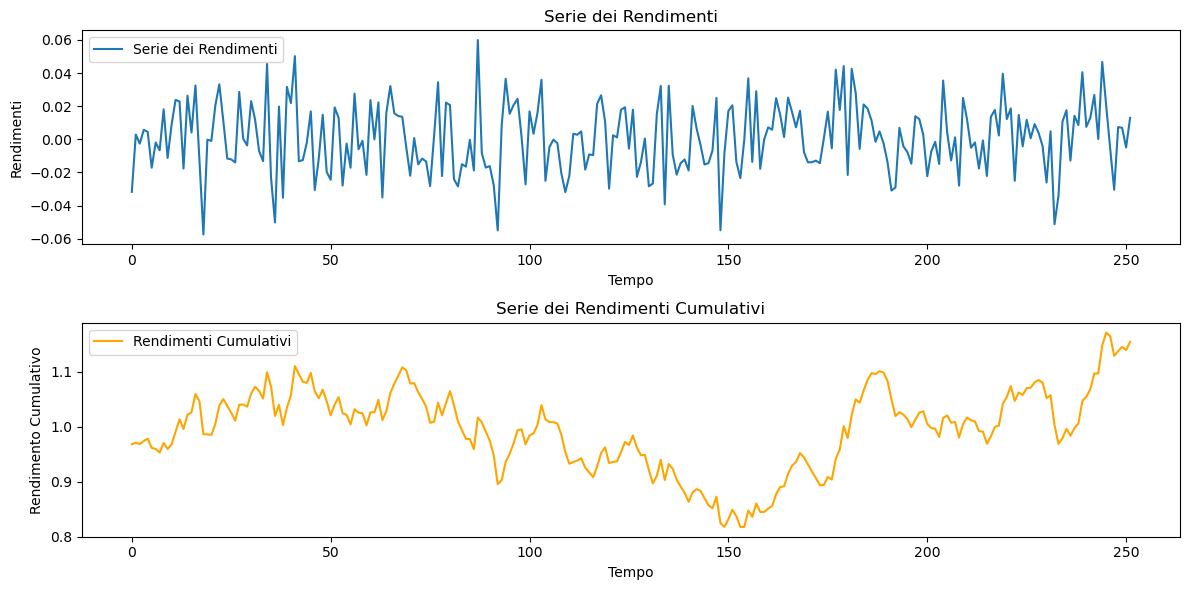

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri della distribuzione normale
mu = 0.001  # Media dei rendimenti
sigma = 0.02  # Deviazione standard dei rendimenti
n = 252  # Numero di periodi temporali (es. giorni di trading in un anno)

# Generazione dei rendimenti casuali
returns = np.random.normal(mu, sigma, n)

# Calcolo dei rendimenti cumulativi
cumulative_returns = np.cumprod(returns + 1)

# Creazione del grafico
plt.figure(figsize=(12, 6))

# Serie dei rendimenti
plt.subplot(2, 1, 1)
plt.plot(returns, label='Serie dei Rendimenti')
plt.title('Serie dei Rendimenti')
plt.xlabel('Tempo')
plt.ylabel('Rendimenti')
plt.legend()

# Serie dei rendimenti cumulativi
plt.subplot(2, 1, 2)
plt.plot(cumulative_returns, label='Rendimenti Cumulativi', color='orange')
plt.title('Serie dei Rendimenti Cumulativi')
plt.xlabel('Tempo')
plt.ylabel('Rendimento Cumulativo')
plt.legend()

# Layout e visualizzazione
plt.tight_layout()
plt.show()


L'evoluzione dei rendimenti cumulativi, o della ricchezza nel tempo, sebbene casuale, è fortemente determinata dal valore dello **Sharpe ratio**,  $\mu / \sigma$, come illustrato nella figura per valori alti e bassi.

Se lo Sharpe ratio è elevato, il rendimento cumulativo presenterà alcune fluttuazioni ma con una crescita costante.  
Al contrario, se il rapporto è basso, le fluttuazioni diventano più ampie e si può persino finire per perdere tutto, portando alla bancarotta.


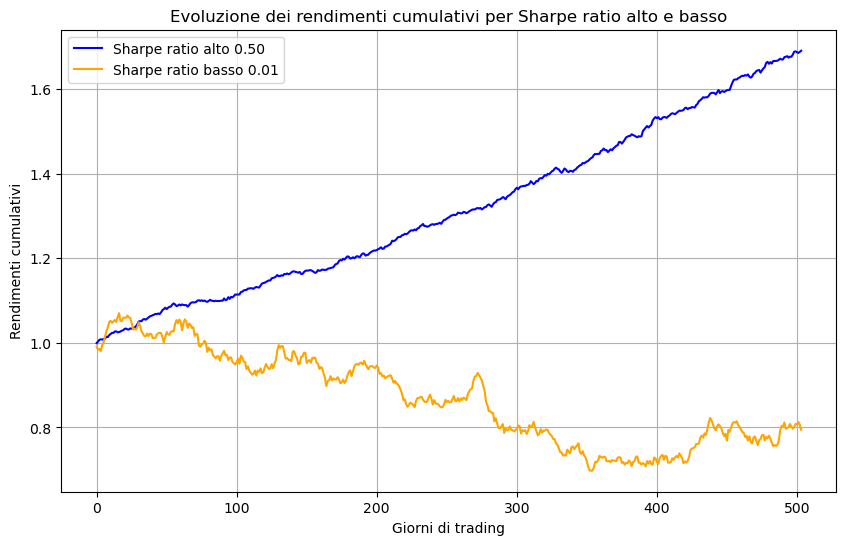

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione per simulare i rendimenti cumulativi
def simulate_cumulative_returns(mu, sigma, T=252, dt=1):
    # Genera rendimenti casuali
    returns = np.random.normal(mu * dt, sigma * np.sqrt(dt), T)
    # Calcola i rendimenti cumulativi
    cumulative_returns = np.cumprod(returns + 1)
    cumulative_returns[cumulative_returns < 0] = 0
    return cumulative_returns

# Parametri
mu_high = 0.001  # Rendimento medio per Sharpe ratio alto
sigma_high = 0.002  # Volatilità per Sharpe ratio alto
mu_low = 0.00012  # Rendimento medio per Sharpe ratio basso
sigma_low = 0.01  # Volatilità per Sharpe ratio basso
T = 504  # Numero di giorni di trading in un anno

# Simulazione dei rendimenti cumulativi
cumulative_returns_high = simulate_cumulative_returns(mu_high, sigma_high, T)
cumulative_returns_low = simulate_cumulative_returns(mu_low, sigma_low, T)

# Grafico dei risultati
plt.figure(figsize=(10, 6))

label = f'Sharpe ratio alto {mu_high/sigma_high:.2f}'
plt.plot(cumulative_returns_high, label=label, color='blue')


label = f'Sharpe ratio basso {mu_low/sigma_low:.2f}'
plt.plot(cumulative_returns_low, label=label, color='orange')



plt.xlabel('Giorni di trading')
plt.ylabel('Rendimenti cumulativi')
plt.title('Evoluzione dei rendimenti cumulativi per Sharpe ratio alto e basso')
plt.legend()
plt.grid(True)
plt.show()


Cosa può fare un investitore per migliorare il rendimento cumulativo? Sebbene la natura casuale degli asset di investimento non possa essere modificata, esistono almeno due dimensioni che possono essere potenzialmente sfruttate: la dimensione temporale e la dimensione degli asset.

* **"Dimensione temporale**: può darsi che la distribuzione del rendimento casuale  $X_t$  cambi nel tempo, portando a valori variabili nel tempo di  $\mu_t$  e  $\sigma_t^2$. In tal caso, un investitore intelligente adatterà la dimensione dell'investimento al valore corrente di  $\mu_t / \sigma_t$. Per fare ciò, è necessario sviluppare un opportuno modello di serie temporali, ovvero un modello dei dati al tempo $t$ dato dalle osservazioni passate. Questo si chiama **modellazione dei dati** ed è trattato nella Parte I di questo libro.

* **"Dimensione degli asset**: In generale, un investitore ha la possibilità di scegliere tra $N$  asset potenziali in cui investire, con rendimenti $X_i$ per $i = 1, \dots, N$. Supponiamo che siano tutti indipendenti e identicamente distribuiti (i.i.d.): $X_i \sim \mathcal{N}(\mu, \sigma^2)$. Dalla probabilità di base, segue che la media di tali rendimenti, $\frac{1}{N} \sum_{i=1}^N X_i$, mantiene la media $\mu$  ma gode di una varianza ridotta pari a $\frac{\sigma^2}{N}$. In finanza, questa media si ottiene distribuendo il capitale in modo uguale tra i $N$  asset (il popolare portafoglio $1/N$ implementa esattamente questo). Tuttavia, nella pratica, il fattore $1/N$ nella riduzione della varianza non può essere raggiunto perché i rendimenti casuali $X_i$  sono correlati tra gli asset, cioè l’assunzione di incorrelazione non è valida.  Nel corso dei decenni, accademici e professionisti hanno proposto una moltitudine di modi per allocare correttamente il capitale, in alternativa all’allocazione base $1/N$, nel tentativo di aggirare la correlazione intrinseca degli asset e minimizzare il rischio o la varianza. Questo è chiamato **ottimizzazione del portafoglio** (nota anche come allocazione o progettazione del portafoglio) ed è trattato in dettaglio nella Parte II di questo libro.

## Visione d’insieme  

I due componenti principali per la progettazione di un portafoglio sono la **modellazione dei dati** e l'**ottimizzazione del portafoglio**.  
La **Figura 1.3** illustra questi due blocchi fondamentali nel caso dei portafogli media-varianza (cioè basati sul vettore delle medie $\mu$ e sulla matrice di covarianza $\Sigma$) per produrre i pesi ottimali del portafoglio $w$.

![model](./images/diagram-modeling-mean-var-portfolio.svg)

La Parte I di questo libro esamina il componente della modellazione dei dati nella Figura 1.3. Lo scopo principale di questo blocco è caratterizzare la distribuzione statistica dei rendimenti futuri, principalmente in termini dei momenti del primo e del secondo ordine, $\mu$  e $\Sigma$, che verranno successivamente utilizzati dal blocco di ottimizzazione del portafoglio.

La Parte II esplora in modo approfondito una vasta gamma di formulazioni per il componente di ottimizzazione del portafoglio nella Figura 1.3.  
Queste formulazioni di portafoglio possono essere classificate secondo criteri differenti, dando origine a una tassonomia diversificata di portafogli, come segue.


## Tassonomia in base ai dati utilizzati

### Portafogli di secondo ordine
Portafogli basati sulla media e sulla varianza, come ad esempio:
- il portafoglio media-varianza di Markowitz,
- il portafoglio a massimo Sharpe ratio,
- i portafogli di replica di indici (*index tracking*),
- i portafogli di parità di rischio basati sulla volatilità.

### Portafogli di ordine superiore
Portafogli basati direttamente su momenti di ordine superiore, nonché su approssimazioni di portafogli basati sull'utilità.

### Portafogli basati su dati grezzi
Questi includono portafogli che richiedono i dati grezzi, come:
- portafogli basati sul rischio di ribasso (*downside risk*),
- portafogli a semivarianza,
- portafogli basati sul valore a rischio condizionato (CVaR),
- portafogli basati sul *drawdown*,
- portafogli basati su grafi,
- portafogli basati su apprendimento profondo (*deep learning*).

## Tassonomia in base alla visione sull'ipotesi di mercato efficiente

### Portafogli attivi
La maggior parte delle formulazioni di portafoglio che cercano di battere il mercato.

### Portafogli passivi
Portafogli di replica di indici (*index tracking*) che si limitano a seguire il mercato, evitando ribilanciamenti frequenti del portafoglio.


## Tassonomia in base alla natura miopica della formulazione del portafoglio

### Portafogli a singolo periodo
La maggior parte delle formulazioni considerate qui si basa su un singolo passo nel futuro.

### Portafogli a più periodi
Formulazioni più complesse che considerano diversi passi nel futuro, in modo da tenere meglio conto degli effetti a lungo termine delle azioni attuali.  
> *Nota: questa categoria non è trattata in questo libro. Si veda Boyd et al. (2017) per una monografia sull'ottimizzazione di portafoglio multi-periodo.*